In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
import gc
import os

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings('ignore')


In [4]:
import ipywidgets as widgets
import io
import os
from PIL.Image import core as _imaging
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [5]:
X_train = []
y_train = []
image_size = 150


In [6]:
path = r'C:\Users\M.Sc-II-Bioinfo-10\miniconda3\Training-1'
classes = os.listdir(path)
classes


['glioma', 'meningioma', 'notumor', 'pituitary']

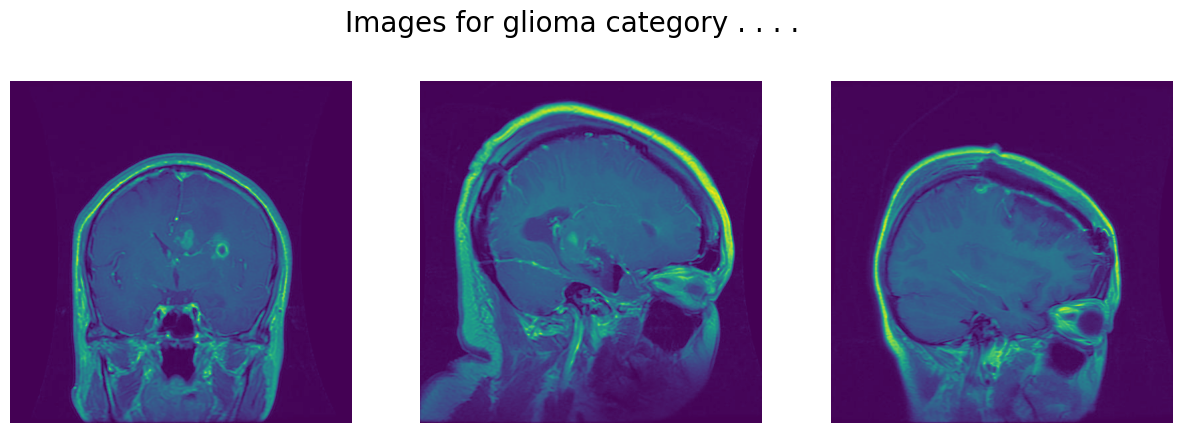

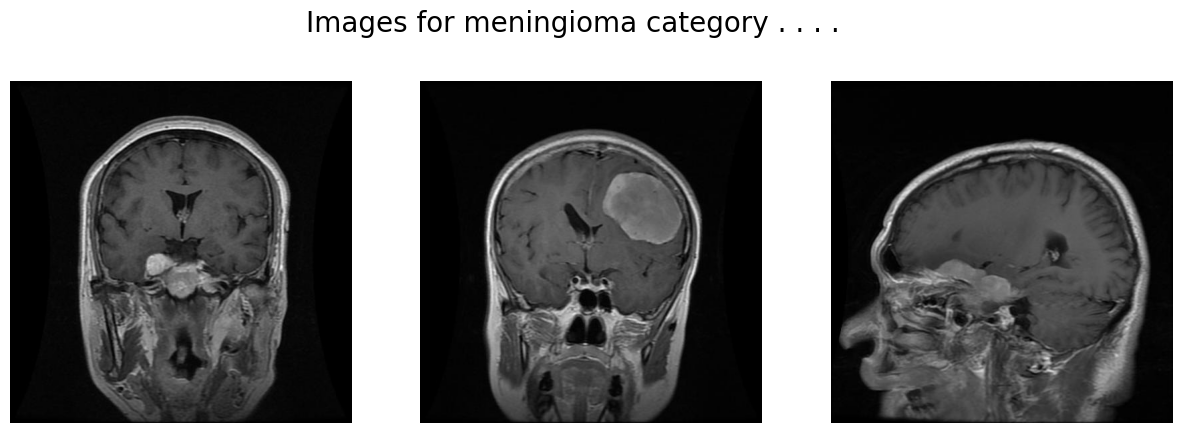

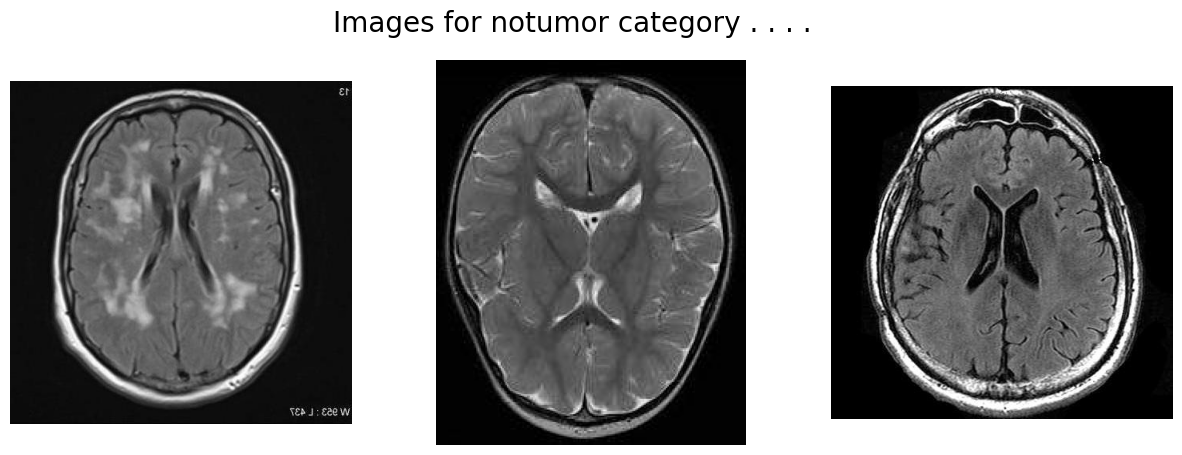

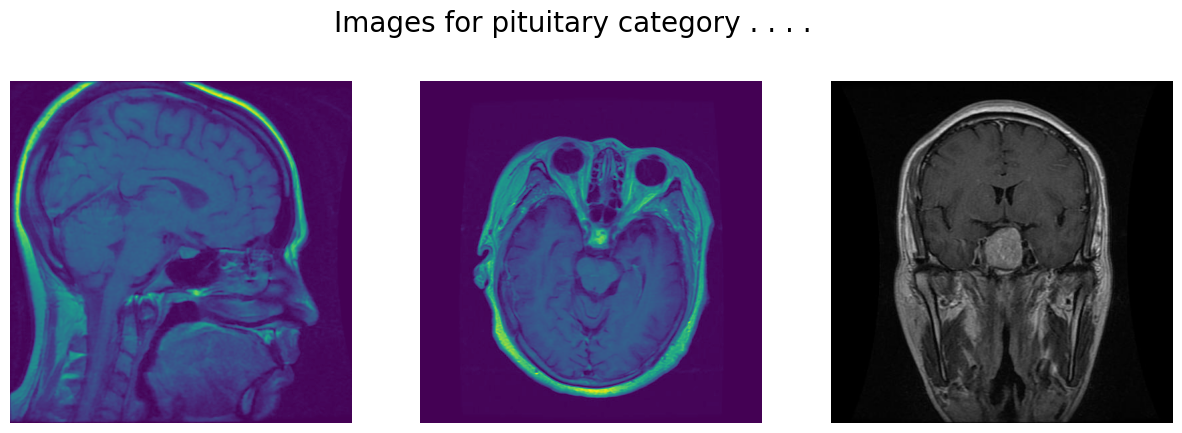

In [8]:
train_path = r'C:\Users\M.Sc-II-Bioinfo-10\miniconda3\Training-1'
for cat in classes:
	image_dir = f'{path}/{cat}'
	images = os.listdir(image_dir)

	fig, ax = plt.subplots(1, 3, figsize=(15, 5))
	fig.suptitle(f'Images for {cat} category . . . .', fontsize=20)

	for i in range(3):
		k = np.random.randint(0, len(images))
		img = np.array(Image.open(f'{path}/{cat}/{images[k]}'))
		ax[i].imshow(img)
		ax[i].axis('off')
	plt.show()


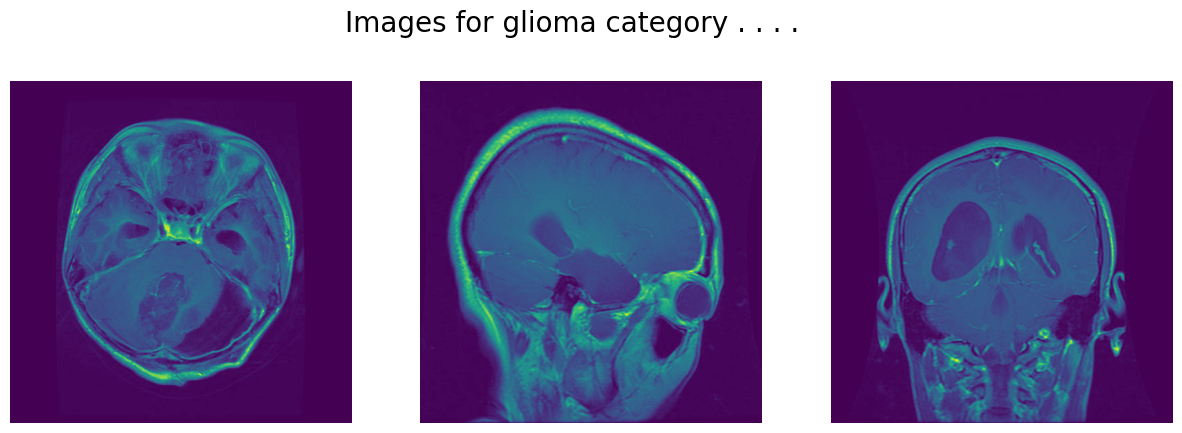

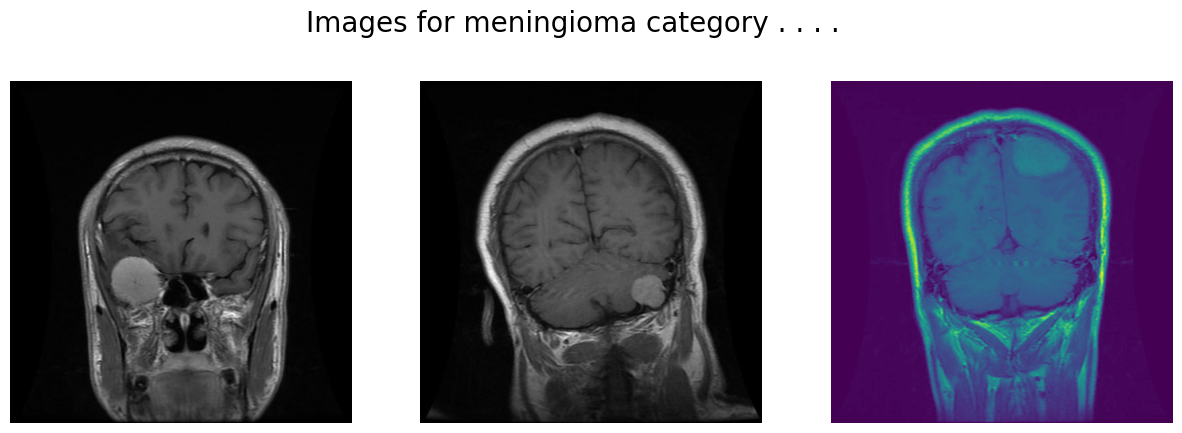

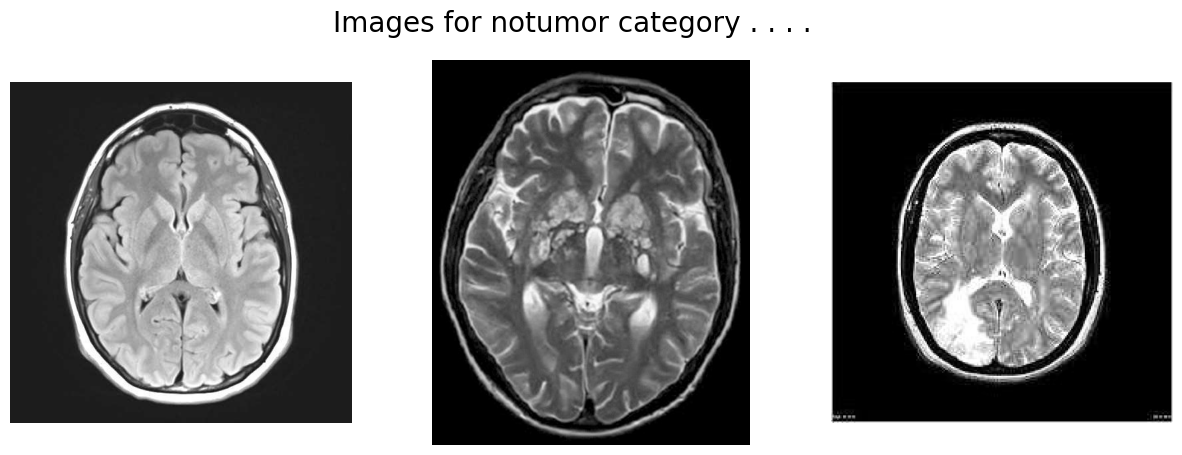

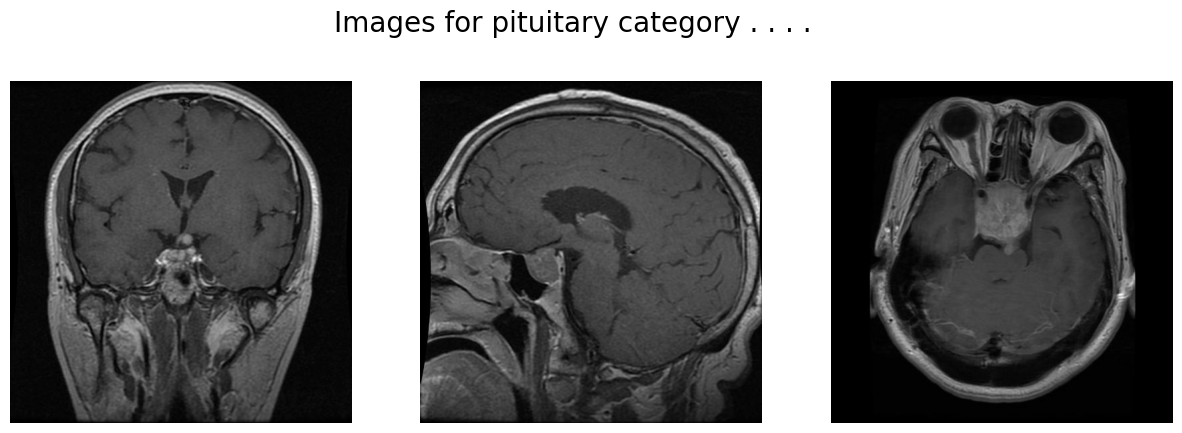

In [9]:
test_path = r'C:\Users\M.Sc-II-Bioinfo-10\miniconda3\Testing-1'
for cat in classes:
	image_dir = f'{path}/{cat}'
	images = os.listdir(image_dir)

	fig, ax = plt.subplots(1, 3, figsize=(15, 5))
	fig.suptitle(f'Images for {cat} category . . . .', fontsize=20)

	for i in range(3):
		k = np.random.randint(0, len(images))
		img = np.array(Image.open(f'{path}/{cat}/{images[k]}'))
		ax[i].imshow(img)
		ax[i].axis('off')
	plt.show()

In [10]:
train_path = r'C:\Users\M.Sc-II-Bioinfo-10\miniconda3\Training-1'
labels = os.listdir(train_path)
print(labels)

['glioma', 'meningioma', 'notumor', 'pituitary']


In [11]:
for i in labels:
    folder_path = os.path.join(train_path, i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.resize(img, (image_size, image_size))
        
        X_train.append(img)
        y_train.append(i)

In [12]:
test_path = r'C:\Users\M.Sc-II-Bioinfo-10\miniconda3\Testing-1'

In [13]:
for i in labels:
    folder_path = os.path.join(test_path, i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.resize(img, (image_size, image_size))
        
        X_train.append(img)
        y_train.append(i)

In [14]:
X_train[1]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [15]:
y_train[1]

'glioma'

In [16]:
len(X_train), len(y_train)

(7023, 7023)

In [17]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [18]:
X_train.shape, y_train.shape

((7023, 150, 150, 3), (7023,))

In [19]:
X_train[1]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [20]:
y_train[1]

'glioma'

In [21]:
X_train, y_train = shuffle(X_train, y_train, random_state = 99)
X_train.shape, y_train.shape

((7023, 150, 150, 3), (7023,))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1, random_state = 100)

In [23]:
y_train[:5]

array(['meningioma', 'pituitary', 'glioma', 'notumor', 'glioma'],
      dtype='<U10')

In [24]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))

y_train_new[:5]

[1, 3, 0, 2, 0]

In [25]:
y_train_new = tf.keras.utils.to_categorical(y_train_new)
y_train_new

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [26]:
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))

y_test_new = tf.keras.utils.to_categorical(y_test_new)
y_test_new

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [27]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (image_size, image_size, 3)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(4, activation = 'softmax'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [29]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [30]:
hist = model.fit(X_train, y_train_new, epochs = 20, validation_split = 0.1)

Epoch 1/20
178/178 [==============================] - 552s 3s/step - loss: 1.4315 - accuracy: 0.4281 - val_loss: 1.2724 - val_accuracy: 0.4905
Epoch 2/20
178/178 [==============================] - 525s 3s/step - loss: 0.7356 - accuracy: 0.7018 - val_loss: 1.2733 - val_accuracy: 0.4604
Epoch 3/20
178/178 [==============================] - 546s 3s/step - loss: 0.6048 - accuracy: 0.7607 - val_loss: 0.7787 - val_accuracy: 0.6646
Epoch 4/20
178/178 [==============================] - 559s 3s/step - loss: 0.4838 - accuracy: 0.8128 - val_loss: 0.6678 - val_accuracy: 0.7168
Epoch 5/20
178/178 [==============================] - 554s 3s/step - loss: 0.3829 - accuracy: 0.8594 - val_loss: 0.8344 - val_accuracy: 0.6756
Epoch 6/20
178/178 [==============================] - 548s 3s/step - loss: 0.3151 - accuracy: 0.8843 - val_loss: 0.4119 - val_accuracy: 0.8481
Epoch 7/20
178/178 [==============================] - 551s 3s/step - loss: 0.3128 - accuracy: 0.8813 - val_loss: 0.8522 - val_accuracy: 0.6788

In [31]:
model.save("Brain_Tumor_Image_Classification_Model.h5")

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load the data
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Preprocess the data
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0
train_images = np.reshape(train_images, (-1, 28, 28, 1))
test_images = np.reshape(test_images, (-1, 28, 28, 1))

# Define the model
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model.fit(train_images, train_labels, batch_size=64, epochs=5, validation_split=0.1)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.2f}")

# Make predictions on the test data
predictions = model.predict(test_images)

# Use ResNet
model = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_shape=(224,224,3),
    classes=1000,
)

# Use VGG16
model = tf.keras.applications.VGG16(
    include_top=True,
    weights=None,
    input_shape=(224,224,3),
    classes=1000,
)


4422102/4422102 [==============================] - 2s 0us/step
Epoch 1/5
844/844 [==============================] - 31s 31ms/step - loss: 0.6185 - accuracy: 0.7754 - val_loss: 0.4127 - val_accuracy: 0.8528
Epoch 2/5
844/844 [==============================] - 26s 31ms/step - loss: 0.4309 - accuracy: 0.8463 - val_loss: 0.3636 - val_accuracy: 0.8683
Epoch 3/5
844/844 [==============================] - 27s 32ms/step - loss: 0.3850 - accuracy: 0.8615 - val_loss: 0.3281 - val_accuracy: 0.8830
Epoch 4/5
844/844 [==============================] - 26s 31ms/step - loss: 0.3598 - accuracy: 0.8712 - val_loss: 0.3131 - val_accuracy: 0.8850
Epoch 5/5
313/313 [==============================] - 1s 5ms/step - loss: 0.3152 - accuracy: 0.8891
Test accuracy: 0.89
313/313 [==============================] - 3s 5ms/step


In [40]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score

import ipywidgets as widgets
import io
import os
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam


In [41]:

# Loading VGG16 network
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False

# Freeze convolution weights
for layer in base_model.layers:
    layer.trainable = False

In [42]:
# Add classification layers
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [43]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 16,813,124
Trainable params: 2,098,436
Non-trainable params: 14,714,688
_________________________________________________________________


In [44]:
optimizer = Adam(lr=0.0001)
loss = 'categorical_crossentropy'

In [45]:
# Training and validation functions
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])


In [46]:
hist = model.fit(X_train, y_train_new, epochs=20, validation_split=0.1)

Epoch 1/20
178/178 [==============================] - 355s 2s/step - loss: 2.6773 - accuracy: 0.7368 - val_loss: 0.5468 - val_accuracy: 0.8813
Epoch 2/20
178/178 [==============================] - 349s 2s/step - loss: 0.5635 - accuracy: 0.8562 - val_loss: 0.3540 - val_accuracy: 0.8908
Epoch 3/20
178/178 [==============================] - 352s 2s/step - loss: 0.3213 - accuracy: 0.8980 - val_loss: 0.2756 - val_accuracy: 0.9066
Epoch 4/20
178/178 [==============================] - 347s 2s/step - loss: 0.2098 - accuracy: 0.9228 - val_loss: 0.2498 - val_accuracy: 0.9177
Epoch 5/20
178/178 [==============================] - 344s 2s/step - loss: 0.1636 - accuracy: 0.9390 - val_loss: 0.2491 - val_accuracy: 0.9256
Epoch 6/20
178/178 [==============================] - 345s 2s/step - loss: 0.1511 - accuracy: 0.9480 - val_loss: 0.2426 - val_accuracy: 0.9256
Epoch 7/20
178/178 [==============================] - 345s 2s/step - loss: 0.1033 - accuracy: 0.9611 - val_loss: 0.2332 - val_accuracy: 0.9304

In [47]:
model.save("Brain_Tumor_Image_Classification_Model.h5")

In [48]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']


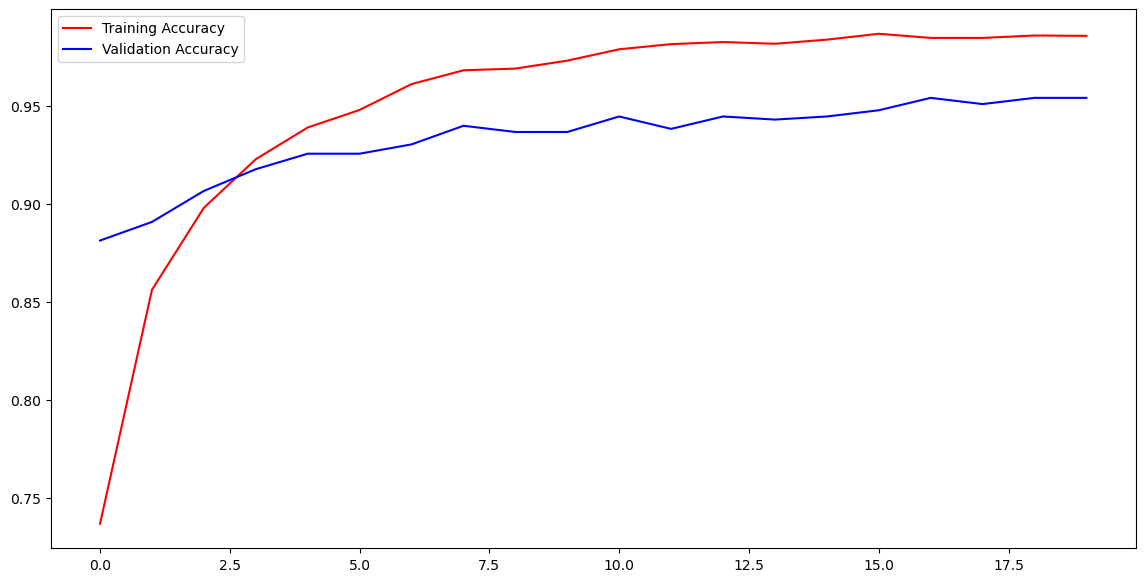

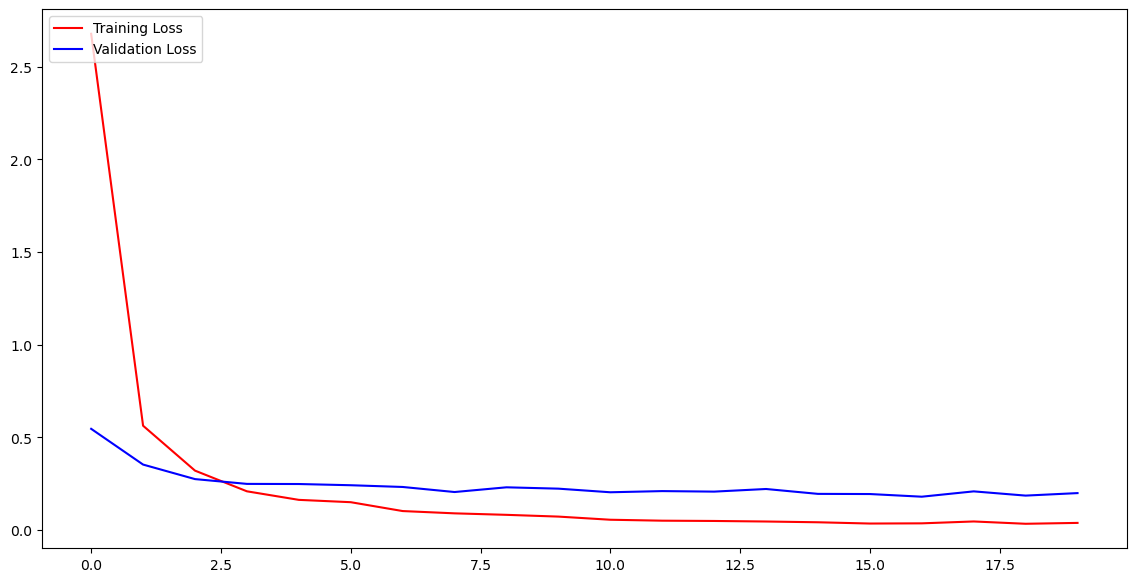

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
epochs = range(len(acc))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.legend(loc = 'upper left')
plt.show()

loss = hist.history['loss']
val_loss = hist.history['val_loss'] 

epochs = range(len(acc))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.legend(loc = 'upper left')
plt.show()

In [58]:
# Load an example image for prediction
img_path = r'C:\Users\M.Sc-II-Bioinfo-10\miniconda3\Testing-1\meningioma\Te-me_0022.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (150,150))
img_array = np.array(img)

# Reshape and predict
img_array = img_array.reshape(1,150,150,3)
prediction = model.predict(img_array)

# Print the prediction
print(prediction)


1/1 [==============================] - 0s 134ms/step
[[4.8098376e-15 9.9999988e-01 5.0466359e-13 6.1762940e-08]]


In [59]:
from tensorflow.keras.preprocessing import image

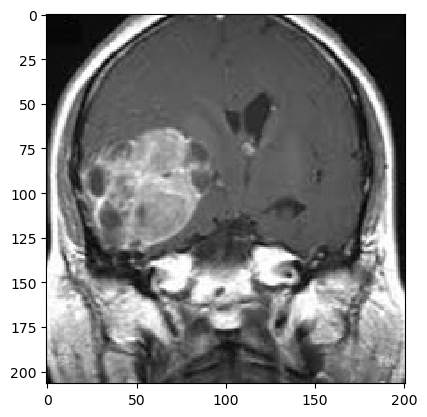

In [60]:
img = image.load_img(img_path)
plt.imshow(img, interpolation = 'nearest')
plt.show()

In [61]:
a = model.predict(img_array)
print(a)

1/1 [==============================] - 0s 98ms/step
[[4.8098376e-15 9.9999988e-01 5.0466359e-13 6.1762940e-08]]


In [62]:
indices = a.argmax()
indices
labels[indices]

'meningioma'

In [85]:
y_pred = model.predict(X_test)


22/22 [==============================] - 38s 2s/step


In [86]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [87]:
y_true_classes = np.argmax(y_test_new, axis=1)

In [88]:
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

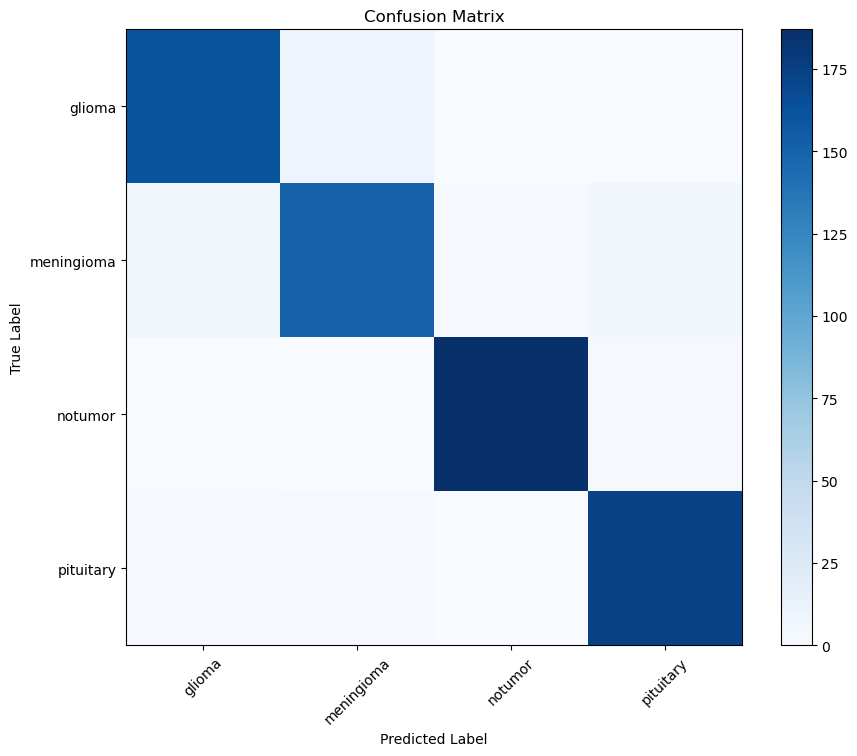

In [89]:
plt.figure(figsize=(10,8))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [90]:
print(classification_report(y_true_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       171
           1       0.93      0.91      0.92       166
           2       0.99      0.99      0.99       189
           3       0.96      0.98      0.97       177

    accuracy                           0.96       703
   macro avg       0.96      0.96      0.96       703
weighted avg       0.96      0.96      0.96       703



In [248]:
train_path = r'C:\Users\M.Sc-II-Bioinfo-10\miniconda3\Training-1'
test_path = r'C:\Users\M.Sc-II-Bioinfo-10\miniconda3\Testing-1'


In [249]:
labels = os.listdir(train_path)


In [250]:
X_test = []
y_test = []
for i in labels:
    folder_path = os.path.join(test_path, i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.resize(img, (image_size, image_size))
        X_test.append(img)
        y_test.append(i)


In [251]:
X_test = np.array(X_test)
y_test = np.array(y_test)


In [252]:
X_test, y_test = shuffle(X_test, y_test, random_state=42)


In [253]:
model = tf.keras.models.load_model("Brain_Tumor_Image_Classification_Model.h5")


In [254]:
random_index = np.random.randint(len(X_test))
img = X_test[random_index]
label = y_test[random_index]


In [255]:
img_array = img.reshape(1, image_size, image_size, 3)

In [256]:
prediction = model.predict(img_array)[0]
predicted_class = np.argmax(prediction)
predicted_label = labels[predicted_class]

1/1 [==============================] - 2s 2s/step


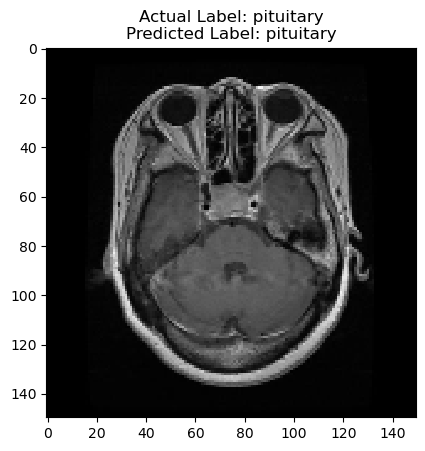

In [257]:
plt.imshow(img, interpolation='nearest')
plt.title(f"Actual Label: {label}\nPredicted Label: {predicted_label}")
plt.show()